<a href="https://colab.research.google.com/github/ananyag27/Machine-Learning-Lab/blob/main/LAB06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
def summation_unit(inputs_arr, weights_arr, bias):
    x = np.dot(inputs_arr, weights_arr) + bias
    return x

def step_activation(x):
    if x>= 0:
        return 1
    else :
        return 0

def bipolar_step_activation(x):
    if x>=0:
        return 1
    else:
        return -1

def sigmoid_activation(x):
    y = 1/(1+np.exp(-x))
    return y

def tanh_activation(x):
    y= np.tanh(x)
    return y

def relu_activation(x):
    if x>0:
        return x
    else:
        return 0

def leaky_relu_activation(x, alpha=0.01):
    return x if x > 0 else alpha * x

def mean_squared_error(y_true, y_pred):
    x = np.mean((np.array(y_true) - np.array(y_pred)) ** 2)
    return x

def mean_absolute_error(y_true, y_pred):
    x =  np.mean(np.abs(np.array(y_true) - np.array(y_pred)))
    return x

Perceptron using Step Activation Function
Final Weights: [0.35 0.05]
Final Bias: -0.39999999999999997
Number of Epochs for Convergence: 25


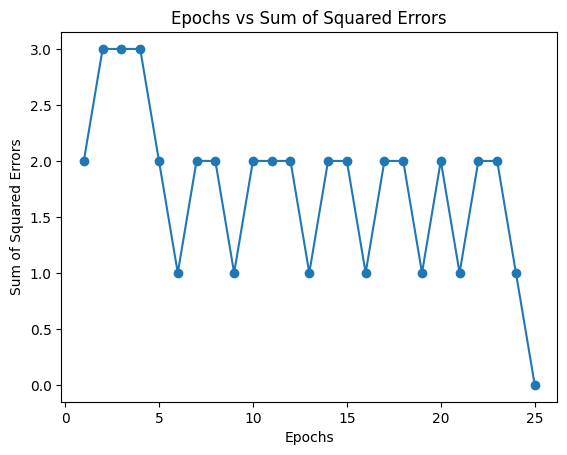



Perceptron using Bi-polar Step Activation Function
Final Weights: [4.8  0.05]
Final Bias: -4.85
Number of Epochs for Convergence: 61


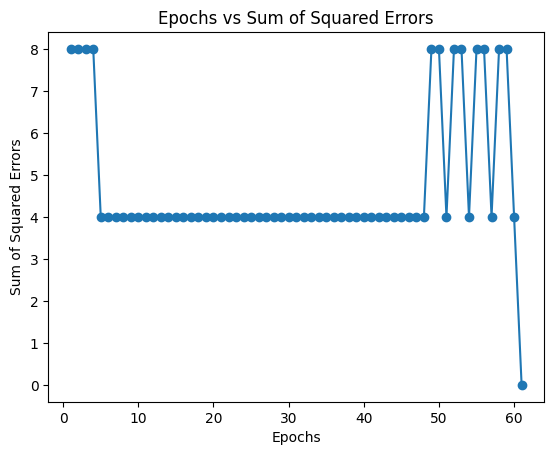



Perceptron using ReLU Activation Function
Final Weights: [4.76109602 0.60817318]
Final Bias: -4.526403976289952
Number of Epochs for Convergence: 0


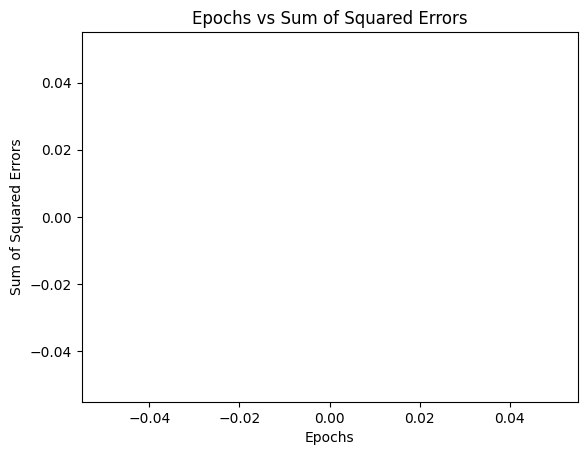


Sigmoid Activation:
Final Weights: [-0.73656334 -1.50689405]
Final Bias: 0.6815695865079562
Epochs to Convergence: 100


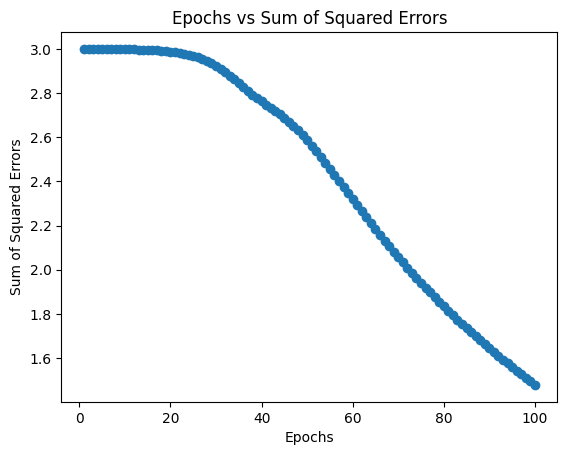

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoidactivation(x):
    y = 1/(1+np.exp(-x))
    return y

def step_activation(x):
    if x>= 0:
        return 1
    else :
        return 0

def reluactivation(x):
    if x>0:
        return x
    else:
        return 0

def bipolar_step_activation(x):
    return 1 if x >= 0 else -1


def perceptron_step(W0, W1, W2, alpha, epochs=100):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 0, 0, 1])
    weights = np.array([W1, W2])
    bias = 0.2
    learning_rate = alpha
    errors = []
    epoch_count = 0

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(X)):
            weightedsum = np.dot(X[i], weights) + bias
            predicted = step_activation(weightedsum)
            error = Y[i] - predicted

            weights = weights + learning_rate * error * X[i]
            bias = bias + learning_rate * error
            total_error += error ** 2
        errors.append(total_error)

        if total_error == 0:
            epoch_count = epoch + 1
            break

    return weights, bias, errors, epoch_count

def perceptron_bipolar(W0, W1, W2, alpha, epochs=100):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([-1, -1, -1, 1])

    weights = np.array([W0, W2])
    bias = W1
    learning_rate = alpha

    errors = []
    epoch_count = 0

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(X)):
            weightedsum = np.dot(X[i], weights) + bias
            predicted = bipolar_step_activation(weightedsum)
            error = Y[i] - predicted

            weights = weights + learning_rate * error * X[i]
            bias = bias + learning_rate * error
            total_error = total_error + error ** 2

        errors.append(total_error)

        if total_error == 0:
            epoch_count = epoch + 1
            break

    return weights, bias, errors, epoch_count

def perceptron_relu(W0, W1, W2, alpha, epochs=100):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 0, 0, 1])

    weights = np.array([W0, W2])
    bias = W1
    learning_rate = alpha

    errors = []
    epoch_count = 0

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(X)):
            weightedsum = np.dot(X[i], weights) + bias
            predicted = reluactivation(weightedsum)
            error = Y[i] - predicted

            weights = weights + learning_rate * error * X[i]
            bias = bias + learning_rate * error
            total_error = total_error + error ** 2

        errors.append(total_error)

        if total_error == 0:
            epoch_count = epoch + 1
            break

    return weights, bias, errors, epoch_count

def perceptronsigmoid(W0, W1, W2, alpha, epochs=100):
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 0, 0, 1])

    weights = np.array([W1, W2])
    bias = W0
    learning_rate = alpha
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X)):
            weightedsum = np.dot(X[i], weights) + bias
            predicted = sigmoidactivation(weightedsum)

            error = Y[i] - predicted
            weights += learning_rate * error * X[i]
            bias += learning_rate * error
            total_error += error ** 2
        errors.append(total_error)
        if total_error == 0:
            break

    return weights, bias, errors, epoch + 1


def plt_grp(num_epochs, error_values):
    plt.plot(range(1, num_epochs + 1), error_values[:num_epochs], marker='o')
    plt.title('Epochs vs Sum of Squared Errors')
    plt.xlabel('Epochs')
    plt.ylabel('Sum of Squared Errors')
    plt.show()

W0 = 10
W1 = 0.75
W2 = -0.75
alpha = 0.05

final_weights, final_bias, error_values, num_epochs = perceptron_step(W0, W1, W2, alpha)
print("Perceptron using Step Activation Function")
print("Final Weights:", final_weights)
print("Final Bias:", final_bias)
print("Number of Epochs for Convergence:", num_epochs)
plt_grp(num_epochs, error_values)

final_weights, final_bias, error_values, num_epochs = perceptron_bipolar(W0, W1, W2, alpha)
print("\n\nPerceptron using Bi-polar Step Activation Function")
print("Final Weights:", final_weights)
print("Final Bias:", final_bias)
print("Number of Epochs for Convergence:", num_epochs)
plt_grp(num_epochs, error_values)

final_weights, final_bias, error_values, num_epochs = perceptron_relu(W0, W1, W2, alpha)
print("\n\nPerceptron using ReLU Activation Function")
print("Final Weights:", final_weights)
print("Final Bias:", final_bias)
print("Number of Epochs for Convergence:", num_epochs)
plt_grp(num_epochs, error_values)

final_weights_sigmoid, final_bias_sigmoid, error_values_sigmoid, num_epochs_sigmoid = perceptronsigmoid(W0, W1, W2, alpha)
print("\nSigmoid Activation:")
print("Final Weights:", final_weights_sigmoid)
print("Final Bias:", final_bias_sigmoid)
print("Epochs to Convergence:", num_epochs_sigmoid)
plt_grp(num_epochs_sigmoid, error_values_sigmoid)

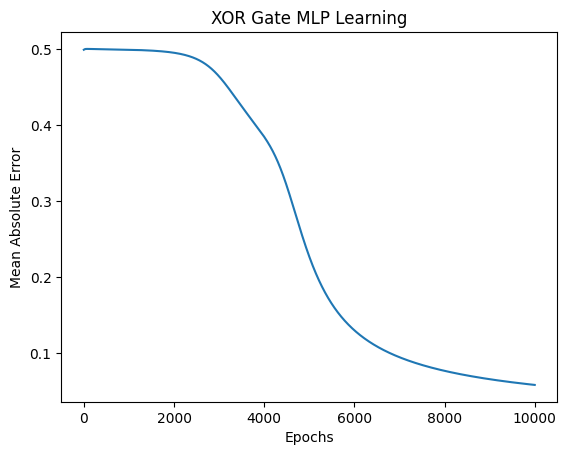

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def mlp_xor_gate(epochs=10000, lr=0.1):
    inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    outputs = np.array([[0], [1], [1], [0]])
    np.random.seed(42)
    input_layer_weights = np.random.uniform(size=(2, 2))
    hidden_layer_weights = np.random.uniform(size=(2, 1))
    bias_hidden = np.random.uniform(size=(1, 2))
    bias_output = np.random.uniform(size=(1, 1))
    epoch_errors = []

    for epoch in range(epochs):
        hidden_input = np.dot(inputs, input_layer_weights) + bias_hidden
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, hidden_layer_weights) + bias_output
        final_output = sigmoid(final_input)
        error = outputs - final_output
        epoch_errors.append(np.mean(np.abs(error)))
        d_output = error * sigmoid_derivative(final_output)
        error_hidden_layer = d_output.dot(hidden_layer_weights.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_output)
        hidden_layer_weights += hidden_output.T.dot(d_output) * lr
        input_layer_weights += inputs.T.dot(d_hidden_layer) * lr
        bias_output += np.sum(d_output, axis=0, keepdims=True) * lr
        bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * lr

    return epoch_errors
errors_xor = mlp_xor_gate()
plt.plot(errors_xor)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('XOR Gate MLP Learning')
plt.show()


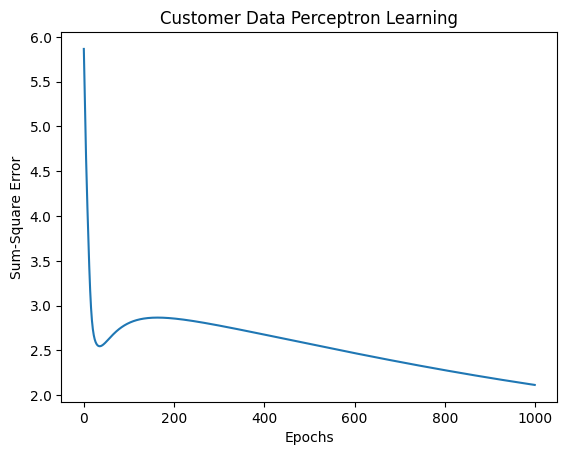

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

# Error calculation function
def error_calculation(actual, predicted):
    return actual - predicted

# Summation unit function
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)

def perceptron_customer(epochs=1000, lr=0.01, threshold=0.5):
    customer_data = np.array([
        [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2],
        [24, 4, 2], [22, 1, 5], [15, 4, 2], [18, 4, 2],
        [21, 1, 4], [16, 2, 4], [20, 6, 2], [19, 1, 3]
    ])

    targets = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

    np.random.seed(42)
    weights = np.random.rand(3)
    bias = np.random.rand(1)

    epoch_errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(customer_data)):
            summation = summation_unit(customer_data[i], weights) + bias
            prediction = sigmoid_activation(summation)
            error = error_calculation(targets[i], prediction)
            total_error += error ** 2
            weights += lr * error * customer_data[i]
            bias += lr * error
        epoch_errors.append(total_error)

    return epoch_errors

errors_customer = perceptron_customer()
plt.plot(errors_customer)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Customer Data Perceptron Learning')
plt.show()


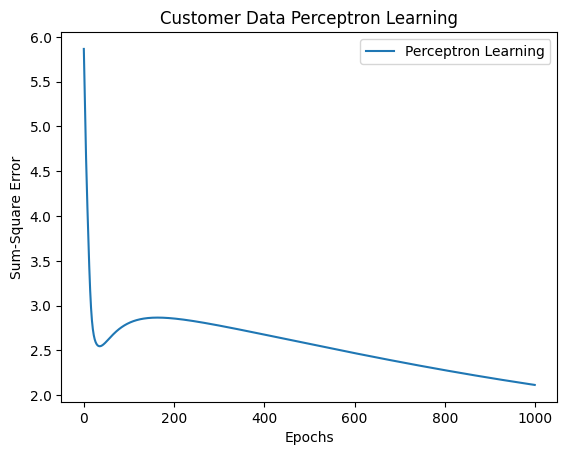

Final Perceptron Weights: [ 0.26153692  0.33208124 -1.09918865]
Final Perceptron Bias: [-3.86604491]
Final Error (Perceptron): [2.11483786]

Pseudo-Inverse Weights: [0.08317961 0.10888848 0.00070994]
Pseudo-Inverse Bias: -1.582147965463005
Total Error (Pseudo-Inverse): 2.5664628594082783


In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Sigmoid activation function
def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

#Error calculation function
def error_calculation(actual, predicted):
    return actual - predicted

# Summation unit function
def summation_unit(inputs, weights):
    return np.dot(inputs, weights)
def perceptron_customer(epochs=1000, lr=0.01, threshold=0.5):
    customer_data = np.array([
        [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2],
        [24, 4, 2], [22, 1, 5], [15, 4, 2], [18, 4, 2],
        [21, 1, 4], [16, 2, 4], [20, 6, 2], [19, 1, 3]
    ])
    targets = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

    np.random.seed(42)
    weights = np.random.rand(3)
    bias = np.random.rand(1)

    epoch_errors = []

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(customer_data)):
            summation = summation_unit(customer_data[i], weights) + bias
            prediction = sigmoid_activation(summation)
            error = error_calculation(targets[i], prediction)
            total_error += error ** 2
            weights += lr * error * customer_data[i]
            bias += lr * error

        epoch_errors.append(total_error)

    return epoch_errors, weights, bias

def pseudo_inverse_customer():
    customer_data = np.array([
        [20, 6, 2], [16, 3, 6], [27, 6, 2], [19, 1, 2],
        [24, 4, 2], [22, 1, 5], [15, 4, 2], [18, 4, 2],
        [21, 1, 4], [16, 2, 4], [20, 6, 2], [19, 1, 3]
    ])
    targets = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

    customer_data_with_bias = np.c_[customer_data, np.ones(customer_data.shape[0])]

    pseudo_inverse = np.linalg.pinv(customer_data_with_bias)

    weights_pseudo_inverse = np.dot(pseudo_inverse, targets)

    weights, bias = weights_pseudo_inverse[:-1], weights_pseudo_inverse[-1]

    predictions = sigmoid_activation(np.dot(customer_data, weights) + bias)
    total_error = np.sum((targets - predictions) ** 2)

    return total_error, weights, bias

errors_customer, final_weights_perceptron, final_bias_perceptron = perceptron_customer()

error_pseudo_inverse, weights_pseudo_inverse, bias_pseudo_inverse = pseudo_inverse_customer()

plt.plot(errors_customer, label='Perceptron Learning')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.title('Customer Data Perceptron Learning')
plt.legend()
plt.show()
print("Final Perceptron Weights:", final_weights_perceptron)
print("Final Perceptron Bias:", final_bias_perceptron)
print("Final Error (Perceptron):", errors_customer[-1])
print("\nPseudo-Inverse Weights:", weights_pseudo_inverse)
print("Pseudo-Inverse Bias:", bias_pseudo_inverse)
print("Total Error (Pseudo-Inverse):", error_pseudo_inverse)

In [7]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

# Input dataset (AND gate inputs)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset (AND gate outputs)
y = np.array([[0], [0], [0], [1]])

np.random.seed(1)
weights_input_hidden = np.random.uniform(size=(2, 2))
weights_hidden_output = np.random.uniform(size=(2, 1))
bias_hidden = np.random.uniform(size=(1, 2))
bias_output = np.random.uniform(size=(1, 1))
learning_rate = 0.1
epochs = 10000

for epoch in range(epochs):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_input)
    error = y - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_output = error_hidden_layer * sigmoid_derivative(hidden_output)
    weights_hidden_output += hidden_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0) * learning_rate
    bias_hidden += np.sum(d_hidden_output, axis=0) * learning_rate

# Final output
print("Final output:")
print(predicted_output)

Final output:
[[0.00121608]
 [0.02568661]
 [0.02661046]
 [0.96088212]]


In [9]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Input dataset for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y = np.array([[1, 0],
              [1, 0],
              [1, 0],
              [0, 1]])

# Initialize weights and biases
np.random.seed(1)
weights_input_hidden = np.random.uniform(size=(2, 2))
weights_hidden_output = np.random.uniform(size=(2, 2))
bias_hidden = np.random.uniform(size=(1, 2))
bias_output = np.random.uniform(size=(1, 2))
learning_rate = 0.05
epochs = 10000

for epoch in range(epochs):
    # Forward Propagation
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_input)
    error = y - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_output = error_hidden_layer * sigmoid_derivative(hidden_output)

    weights_hidden_output += hidden_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += X.T.dot(d_hidden_output) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0) * learning_rate
    bias_hidden += np.sum(d_hidden_output, axis=0) * learning_rate

print("AND Gate Final output:")
print(predicted_output)

AND Gate Final output:
[[0.99582159 0.00436458]
 [0.96428335 0.03609876]
 [0.96056181 0.03881204]
 [0.05860904 0.94170127]]
